In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as la
df = pd.read_csv("Iris.csv")
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [3]:
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [5]:
species = df["species"].tolist()
X = df.drop("species", 1)

C:\Users\APOORV~1\AppData\Local\Temp/ipykernel_10936/3498328368.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("species", 1)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [8]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

In [9]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors


(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
        [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
        [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
        [-0.56485654, -0.06694199, -0.63427274,  0.52359713]]))

In [10]:
# method2
np.linalg.eig(X_corr)

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [23]:
covariance=np.dot(X.T,X)/(X.shape[0]-1)
print(covariance)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [24]:
eigenvalues,eigenvector=np.linalg.eig(covariance)
print("eigenvalues \n",eigenvalues)
print("eigenvector \n",eigenvector)

eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [25]:
eigenvector=eigenvector.T
print("eigenvector after Transpose\n",eigenvector)
indexs=np.argsort(eigenvalues)[::-1]
#taking those indices and storing in eigenvalues and eigenvectors accordingly
eigenvector=eigenvector[indexs]
print("eigenvector after indexes \n",eigenvector)
eigenvalues=eigenvalues[indexs]
print("eigenvalues \n",eigenvalues) 

eigenvector after Transpose
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvector after indexes 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]


variance of each feature--> [73.45212625 23.0041226   3.69354553  0.52134655]


Text(0.5, 0, 'Dimensions')

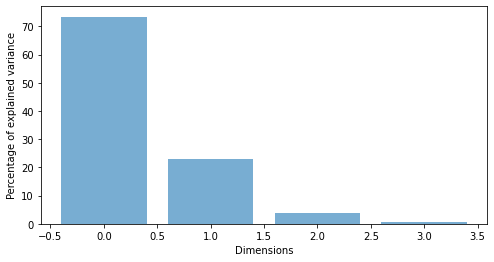

In [26]:
total = sum(eigenvalues)
variance_of_each_feature =(eigenvalues / np.sum(eig_values))*100
print("variance of each feature-->",variance_of_each_feature)
plt.figure(figsize=(8,4))
plt.bar(range(4),variance_of_each_feature, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [27]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

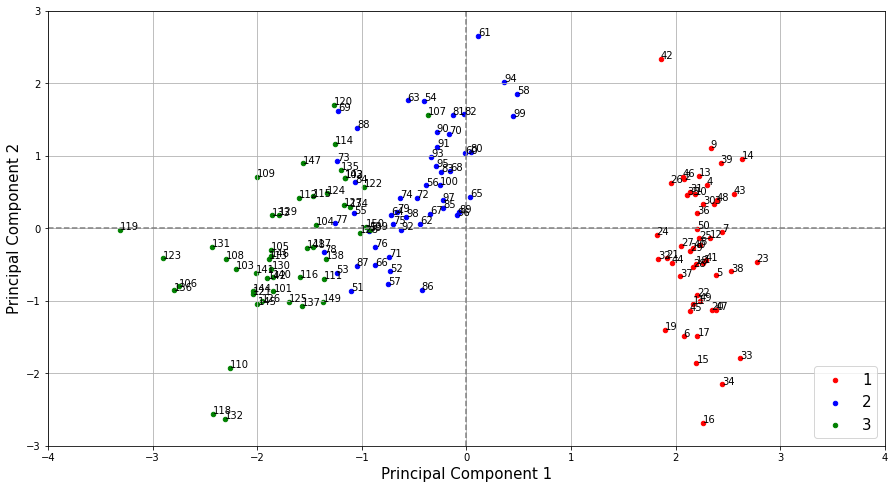

In [28]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)